In [1]:
!pip install transformers datasets torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [2]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline

# Load tokenizer and model
model_name = "cardiffnlp/twitter-xlm-roberta-base-sentiment"  # Pre-trained multilingual sentiment model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Create sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/841 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [3]:
texts = [
    "I love this product!",  # English
    "¡Este producto es increíble!",  # Spanish
    "Ce produit est fantastique!",  # French
    "هذا المنتج رائع!",  # Arabic
    "この商品が大好きです！",  # Japanese
]

# Perform sentiment analysis
results = sentiment_analyzer(texts)

# Display results
for text, result in zip(texts, results):
    print(f"Text: {text}\nSentiment: {result['label']}, Score: {result['score']:.4f}\n")


Text: I love this product!
Sentiment: positive, Score: 0.9349

Text: ¡Este producto es increíble!
Sentiment: positive, Score: 0.9403

Text: Ce produit est fantastique!
Sentiment: positive, Score: 0.9490

Text: هذا المنتج رائع!
Sentiment: positive, Score: 0.9333

Text: この商品が大好きです！
Sentiment: positive, Score: 0.9161



In [5]:
from google.colab import files

# Upload the dataset
uploaded = files.upload()  # A dialog will prompt you to upload the file

Saving data.csv to data.csv


In [6]:
from datasets import load_dataset

# Load dataset
dataset = load_dataset('csv', data_files={'train': 'data.csv'})

# Access the dataset and specify the columns
train_data = dataset['train']
texts = train_data['tweet']  # Extract the 'tweet' column
languages = train_data['language']  # Extract the 'language' column
sentiments = train_data['sentiment']  # Extract the 'sentiment' column

Generating train split: 0 examples [00:00, ? examples/s]

In [8]:
results = sentiment_analyzer(texts)
sentiments = [{"text": text, "sentiment": res['label'], "score": res['score']} for text, res in zip(texts, results)]


In [9]:
import pandas as pd

df = pd.DataFrame(sentiments)
df.to_csv("sentiment_results.csv", index=False)
print("Results saved to sentiment_results.csv")

Results saved to sentiment_results.csv


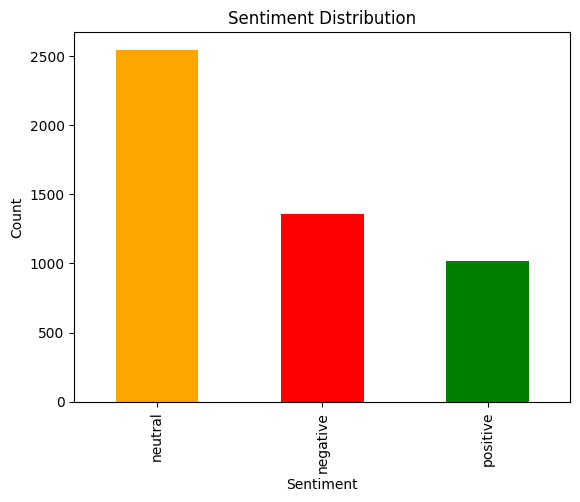

In [16]:
import matplotlib.pyplot as plt

# Analyze sentiment distribution
sentiment_counts = df['sentiment'].value_counts()

# Plot sentiment distribution
sentiment_counts.plot(kind='bar', color=['orange', 'red', 'green'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

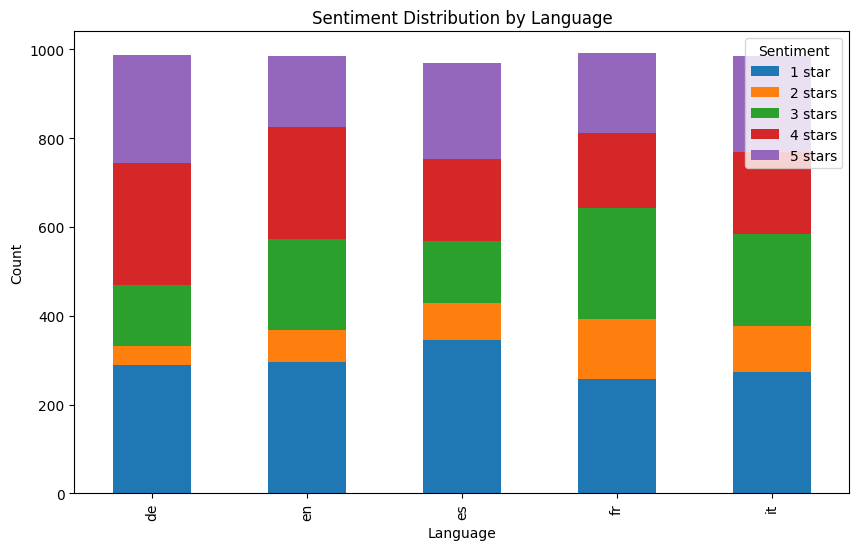

In [17]:
# Group by language and sentiment
language_sentiment = train_data.to_pandas().groupby(['language', 'sentiment']).size().unstack(fill_value=0)

# Visualize the results
language_sentiment.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Sentiment Distribution by Language")
plt.xlabel("Language")
plt.ylabel("Count")
plt.legend(title="Sentiment", loc='upper right')
plt.show()

In [18]:
# Add confidence level categories
def confidence_category(score):
    if score > 0.8:
        return "High Confidence"
    elif score > 0.5:
        return "Medium Confidence"
    else:
        return "Low Confidence"

df['confidence'] = df['score'].apply(confidence_category)

# Save the updated DataFrame
df.to_csv("sentiment_results_with_confidence.csv", index=False)
print("Results with confidence saved to sentiment_results_with_confidence.csv")

Results with confidence saved to sentiment_results_with_confidence.csv


In [20]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
import nltk
print(nltk.data.path)

['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


In [23]:
import nltk
nltk.data.path.append('/content/nltk_data')  # Add a custom directory
nltk.download('punkt', download_dir='/content/nltk_data')  # Download to this directory

[nltk_data] Downloading package punkt to /content/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
!pip install spacy
!python -m spacy download xx_ent_wiki_sm

import spacy
nlp = spacy.load("xx_ent_wiki_sm")

# Tokenize using SpaCy
positive_words = Counter([token.text for token in nlp(positive_tweets)])
negative_words = Counter([token.text for token in nlp(negative_tweets)])

print("Top Positive Words:", positive_words.most_common(10))
print("Top Negative Words:", negative_words.most_common(10))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 101.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('xx_ent_wiki_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Top Positive Words: [(',', 994), ('.', 847), ('de', 719), ('"', 459), ('a', 404), ('la', 381), ('un', 365), ('the', 282), ('que', 234), ('di', 206)]
Top Negative Words: [(',', 1194), ('de', 948), ('.', 920), ('a', 663), ('"', 565), ('la', 556), ('un', 495), ('the', 361), ('que', 357), ('di', 345)]


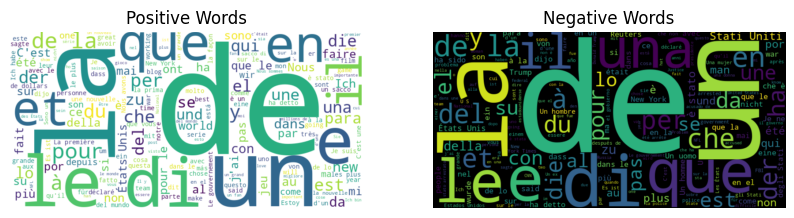

In [25]:
from wordcloud import WordCloud

# Generate word clouds
positive_cloud = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)
negative_cloud = WordCloud(width=800, height=400, background_color='black').generate(negative_tweets)

# Display word clouds
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(positive_cloud, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Words")

plt.subplot(1, 2, 2)
plt.imshow(negative_cloud, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Words")
plt.show()

In [26]:
# Filter highly confident negative tweets
high_confidence_negative = df[(df['sentiment'] == 'negative') & (df['confidence'] == 'High Confidence')]

# Save to a new file
high_confidence_negative.to_csv("high_confidence_negative_tweets.csv", index=False)
print("High confidence negative tweets saved to high_confidence_negative_tweets.csv")

High confidence negative tweets saved to high_confidence_negative_tweets.csv
